In [ ]:
import torch
t1 = torch.tensor(4.)
t1
t1.dtype


torch.float32

In [ ]:
t2 = torch.tensor([1., 2, 3, 4])
t2


tensor([1., 2., 3., 4.])

In [ ]:
t3 = torch.tensor([[5., 6], [7, 8], [9, 10]])
t3



tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [ ]:
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [ ]:
t4.shape

torch.Size([2, 2, 3])

In [ ]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [ ]:
y = w * x + b
y

In [ ]:
y.backward()


In [ ]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

In [ ]:
A = torch.tensor([[2.,-1],[-1,2]])
w = torch.tensor([[0.5],[0.5]], requires_grad=True)
b = torch.tensor([[3.],[6]])
c = torch.tensor(5.)

y = 0.5*w.t() @ A @ w+w.t()@ b +c
for _ in range(100):
  y = 0.5*w.t() @ A @ w+w.t()@ b +c
  y.backward()
  with torch.no_grad():
    w -= w.grad * 0.1
    w.grad.zero_()
print(w)

tensor([[-3.9999],
        [-4.9999]], requires_grad=True)


In [ ]:
# Find the minimum value of w^2+3w+1

w = torch.tensor(0., requires_grad=True)


tensor(-1.5000, requires_grad=True)


Linear Regression

In [ ]:
import numpy as np
X = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [69, 96, 70]], dtype='float32').T
# Targets (apples, oranges)
y = np.array([ 10, 20, 30,5], dtype='float32')

In [ ]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)
print(X)
print(y)

tensor([[ 73.,  91.,  87.,  69.],
        [ 67.,  88., 134.,  96.],
        [ 43.,  64.,  58.,  70.]])
tensor([10., 20., 30.,  5.])


In [ ]:
# Weights and biases
w = torch.randn(3, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([[-1.2184],
        [-0.2636],
        [-0.5988]], requires_grad=True)
tensor([0.4954], requires_grad=True)


In [ ]:
def model(x):
    return w.t()@x + b

preds = model(X)
print(preds)

tensor([[-131.8597, -171.9017, -175.5611, -150.7977]], grad_fn=<AddBackward0>)


In [ ]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()


#Compute loss
loss = mse(preds, y)
print(loss)

tensor(30869.6758, grad_fn=<DivBackward0>)


In [ ]:
for i in range(2000):
    preds = model(X)
    loss = mse(preds, y)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 0.00001
        b -= b.grad * 0.00001
        w.grad.zero_()
        b.grad.zero_()


In [ ]:
preds = model(X)
loss = mse(preds, y)
print(loss)

tensor(16.1577, grad_fn=<DivBackward0>)


Linear regression using PyTorch built-ins


In [ ]:
# Input (temp, rainfall, humidity)
X = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
y = np.array([56 , 81 , 22 ,  103 ,  56 , 81 , 60,  22,   50,  56,  81,   119,   22, 5, 35 ],dtype='float32')

X = torch.from_numpy(X)
y = torch.from_numpy(y)

y.shape

torch.Size([15])

In [ ]:
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(X, y)
a,b = train_ds[0]

In [ ]:
from torch.utils.data import DataLoader
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)



In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 69.,  96.,  70.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.]])
tensor([ 56.,   5.,  22.,  56., 103.])


In [ ]:
import torch.nn as nn

# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4969,  0.2428, -0.5115],
        [ 0.3017,  0.5736, -0.5537]], requires_grad=True)
Parameter containing:
tensor([ 0.0603, -0.4271], requires_grad=True)


In [ ]:
model = nn.Linear(3, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2415, -0.1016, -0.5037]], requires_grad=True)
Parameter containing:
tensor([0.0717], requires_grad=True)


In [ ]:
list(model.parameters())


[Parameter containing:
 tensor([[ 0.2415, -0.1016, -0.5037]], requires_grad=True),
 Parameter containing:
 tensor([0.0717], requires_grad=True)]

In [ ]:
# Parameters
list(model.parameters())

# Generate predictions
preds = model(X)
preds

tensor([[-10.7644],
        [-19.1282],
        [-21.7441],
        [  1.6980],
        [-28.2752],
        [-10.7644],
        [-19.1282],
        [-21.7441],
        [  1.6980],
        [-28.2752],
        [-10.7644],
        [-19.1282],
        [-21.7441],
        [  1.6980],
        [-28.2752]], grad_fn=<AddmmBackward0>)

In [ ]:
# Import nn.functional
import torch.nn.functional as F

In [ ]:
# Define loss function
loss_fn = F.mse_loss

loss = loss_fn(model(X), y)
print(loss)

tensor(6299.6846, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  after removing the cwd from sys.path.


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(1000, model, loss_fn, opt)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  


Epoch [100/1000], Loss: 770.7971
Epoch [200/1000], Loss: 433.0088
Epoch [300/1000], Loss: 1516.0294
Epoch [400/1000], Loss: 1218.9398
Epoch [500/1000], Loss: 1239.4220
Epoch [600/1000], Loss: 1637.8041
Epoch [700/1000], Loss: 867.0541
Epoch [800/1000], Loss: 1388.7329
Epoch [900/1000], Loss: 40.4476
Epoch [1000/1000], Loss: 523.1473


In [ ]:
pred = model(X)
loss = loss_fn(pred, y)
print(loss)

tensor(1007.3383, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  


In [ ]:
y


tensor([ 56.,  81.,  22., 103.,  56.,  81.,  60.,  22.,  50.,  56.,  81., 119.,
         22.,   5.,  35.])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from fastai.vision import Module
from IPython.core.debugger import set_trace

In [ ]:
iris = datasets.load_iris()
X = iris.data   # Get training attributes
y = iris.target # Get labels
input_size = X.shape[-1]
cats = np.sum(np.unique(y)).astype(int)
print('Number of samples:', X.shape[0])
print('Number of attributes:', input_size)
print('Number of categories:', cats)

Number of samples: 150
Number of attributes: 4
Number of categories: 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2020)


In [ ]:
model =  nn.Sequential(
     nn.Linear(4, 3),
     nn.Softmax()
) 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,weight_decay=0.01)

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-0.1174, -0.4084, -0.4839,  0.3204],
        [ 0.4565, -0.4841,  0.2507,  0.0545],
        [-0.2857,  0.3408,  0.4124, -0.0650]], requires_grad=True)
Parameter containing:
tensor([ 0.3755, -0.4305,  0.4284], requires_grad=True)


In [ ]:
x_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [ ]:
def accuracy_multi(x, y):
    return (x.argmax(-1) == y).float().mean()

def fit(x_train, y_train, x_test, y_test, model, criterion, optimizer, num_epochs):
    loss_history      = [] # to save the loss at each epoch.
    loss_test_history = [] # to save the test loss at each epoch.
    out_history       = [] # to save the parameters at each epoch
    acc_train_history = []
    acc_test_history  = [] 
    for ii, epoch in enumerate(range(num_epochs)):
        # forward
        out       = model(x_train)
        loss      = criterion(out, y_train)
        acc_train = accuracy_multi(out, y_train)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # test
        with torch.no_grad():
          out_test  = model(x_test)
          loss_test = criterion(out_test, y_test)
          acc_test  = accuracy_multi(out_test, y_test)
        
          loss_history.append(loss.item())
          loss_test_history.append(loss_test.item())
          acc_train_history.append(acc_train)
          acc_test_history.append(acc_test)
          if ii == 0:
            out_history = out.detach().cpu().numpy()
          else:
            out_history = np.concatenate((out_history, out.detach().cpu().numpy()), axis=-1)
        
    print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.item()))
    return loss_history, loss_test_history, out_history, acc_train_history, acc_test_history

In [ ]:

%time 
loss_train, loss_test, out, acc_train, acc_test = fit(x_train, y_train, x_test, y_test, model, criterion, optimizer, num_epochs=100)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Epoch[100/100], loss:0.973045


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


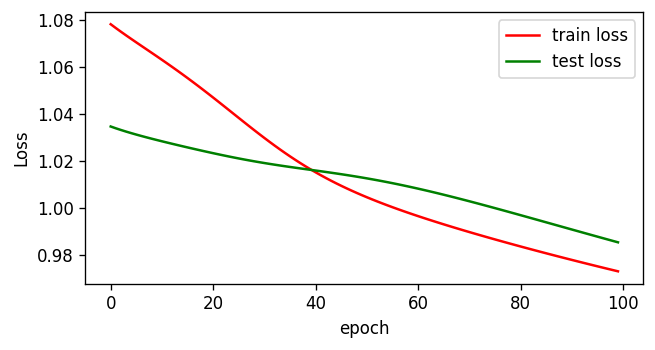

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
plt.plot(loss_train, color='red', label='train loss')
plt.plot(loss_test, color='green', label='test loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

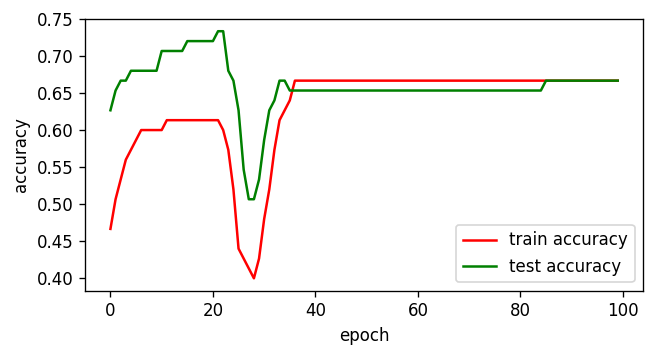

In [ ]:

plt.figure(figsize=(6,3), dpi=120)
plt.plot(acc_train, color='red', label='train accuracy')
plt.plot(acc_test, color='green', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:

x_train = x_train[:, (1,3)]
x_test = x_test[:,(1,3)]


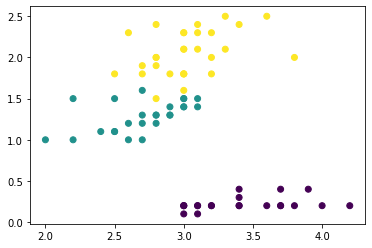

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)


In [ ]:
def accuracy_multi(x, y):
    return (x.argmax(-1) == y).float().mean()

def fit(x_train, y_train, model ,criterion, optimizer, num_epochs):
    for ii, epoch in enumerate(range(num_epochs)):
        # forward
        out       = model(x_train)
        loss      = criterion(out, y_train)
        acc_train = accuracy_multi(out, y_train)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return

In [ ]:
model =  nn.Sequential(
     nn.Linear(2, 3),
     nn.Softmax()
) 
optimizer = optim.SGD(model.parameters(), lr=0.008)
fit(x_train, y_train,model, criterion, optimizer, num_epochs=10000)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


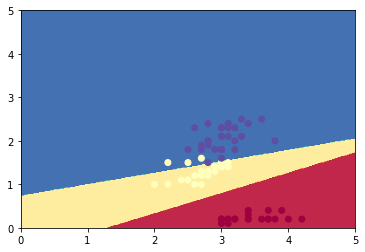

In [ ]:
x1 = np.linspace(0, 5, num=250)
x2 = np.linspace(0, 5, num=250)
x1, x2 = np.meshgrid(x1, x2)

#decision boundry
X_test = torch.tensor([x1.reshape(1,-1), x2.reshape(1,-1)],dtype=torch.float32).reshape(2,-1).t()
with torch.no_grad():
  Label = model(X_test)
  Label = Label.argmax(axis=1)
    # Plot the contour and training examples
plt.contourf( x1,x2,  Label.detach().numpy().reshape(250,250) , cmap=plt.cm.Spectral)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Spectral)